In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Change to wherever your csv is
project = pd.read_csv('/content/drive/MyDrive/DSSI/Q A Project/upov_docs_metadata.csv')

In [ ]:
# Need this to convert iso-2 code into iso-3 code
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 53.8 MB/s eta 0:00:00


In [ ]:
import pycountry

# Processed Countries
processed_iso2 = ['AL','AZ','BA','BG', 'BR', 'BY', 'CL', 'CN', 'CO', 'CR', 'DE',
                  'DK', 'EG', 'FR', 'GE', 'HR', 'HU', 'IS', 'IT', 'JO', 'JP',
                  'KG', 'LT', 'MD', 'ME', 'MX', 'NI', 'OM', 'PA', 'PE', 'PL',
                  'PT', 'PY', 'RO', 'RS', 'RU', 'SI', 'SK', 'TN', 'UY', 'UZ']
project['processed'] = project['country'].isin(processed_iso2)

#Function to change from iso 2 to iso 3
def iso2_to_iso3(iso2):
    try:
        return pycountry.countries.get(alpha_2=iso2.upper()).alpha_3
    except:
        return None

project['iso_3'] = project['country'].apply(iso2_to_iso3)


In [ ]:
import plotly.express as px

# Combine processed/unprocessed into one category
project['status'] = project['processed'].apply(lambda x: 'In dataset')

fig = px.choropleth(
    project,
    locations='iso_3',
    color='status',
    color_discrete_map={
        'In dataset': 'mediumseagreen'
    },
    title='Countries in Dataset'
)

# Outline countries
fig.update_traces(marker_line_width=0.5, marker_line_color='black')

# Make non-included countries pure white
fig.update_geos(
    showcountries=True,
    showcoastlines=True,
    showland=True,
    landcolor="white",   # Pure white background
    projection_type="natural earth"
)

# Remove background color behind oceans
fig.update_layout(
    geo_bgcolor='white',
    paper_bgcolor='white'
)

fig.show()


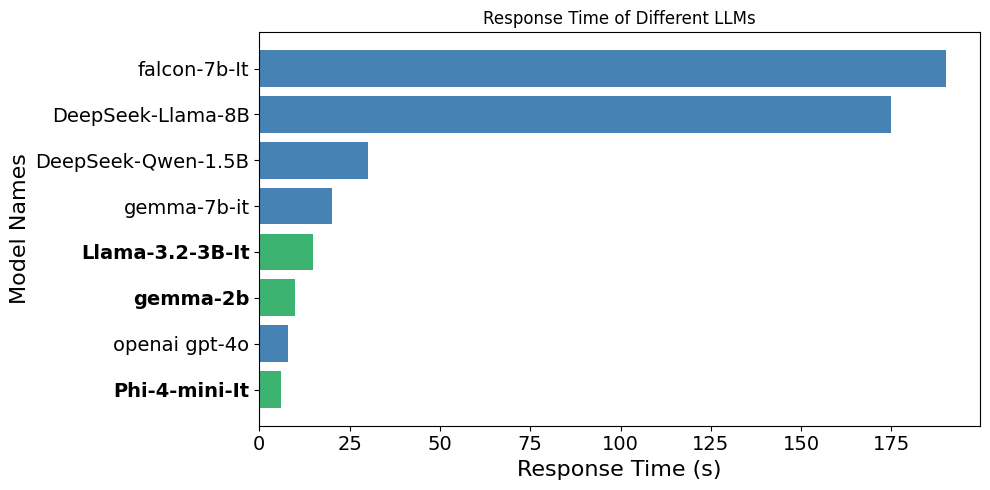

In [ ]:
import matplotlib.pyplot as plt

# Data
response_times = {
    'gemma-7b-it': 20,
    'falcon-7b-It': 190,
    'DeepSeek-Llama-8B': 175,
    'DeepSeek-Qwen-1.5B': 30,
    'gemma-2b': 10,
    'openai gpt-4o': 8,
    'Phi-4-mini-It': 6,
    'Llama-3.2-3B-It': 15
}

focus_models = ['Phi-4-mini-It', 'gemma-2b', 'Llama-3.2-3B-It']

# Sort by response time
sorted_models, sorted_times = zip(*sorted(response_times.items(), key=lambda x: x[1], reverse=True))

# Assign colors: highlight focus models
colors = ['mediumseagreen' if model in focus_models else 'steelblue' for model in sorted_models]

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(sorted_models, sorted_times, color=colors)
plt.xlabel("Response Time (s)", fontsize = 16)
plt.ylabel("Model Names", fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Response Time of Different LLMs")
plt.gca().invert_yaxis()

# Bold labels for focus models
ax = plt.gca()
for label in ax.get_yticklabels():
    if label.get_text() in focus_models:
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()


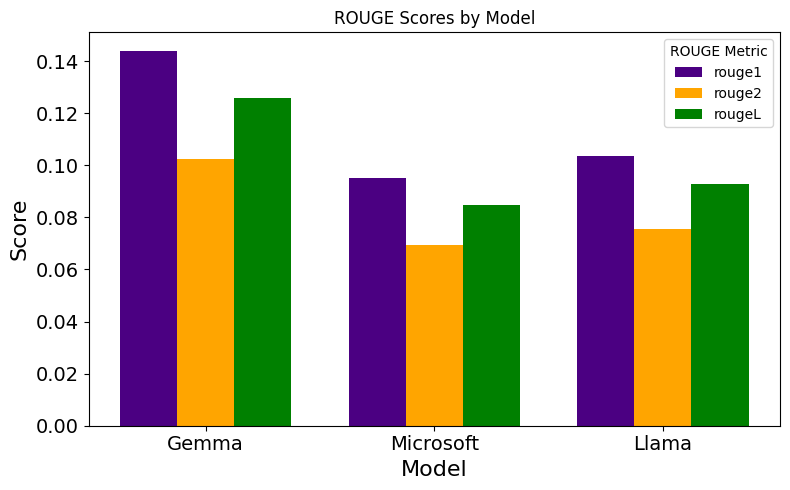

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# === Data from your table ===
models = ["Gemma", "Microsoft", "Llama"]
rouge1 = [0.14382311318037516, 0.09509679985098785, 0.10361525873218687]
rouge2 = [0.10242850489575653, 0.06954930686461773, 0.07533815644583873]
rougeL = [0.12579492007734588, 0.08465806277158829, 0.09285210792122112]

# === Bar positions ===
x = np.arange(len(models))
width = 0.25  # width of each bar

# === Create the plot ===
fig, ax = plt.subplots(figsize=(8, 5))

# Bars for each metric
bars1 = ax.bar(x - width, rouge1, width, label='rouge1', color='indigo')
bars2 = ax.bar(x, rouge2, width, label='rouge2', color='orange')
bars3 = ax.bar(x + width, rougeL, width, label='rougeL', color='green')

# === Labels and title ===
ax.set_xlabel('Model', fontsize = 16)
ax.set_ylabel('Score', fontsize = 16)
ax.set_title('ROUGE Scores by Model')
ax.set_xticks(x)
ax.tick_params(axis='y', labelsize=14)  # Change '12' to any font size you want
ax.set_xticklabels(models, fontsize = 14)
ax.legend(title='ROUGE Metric')
# === Add value labels to each bar ===
# for bars in [bars1, bars2, bars3]:
#     for bar in bars:
#         height = bar.get_height()
#         ax.annotate(f'{height:.3f}',
#                     xy=(bar.get_x() + bar.get_width() / 2, height),
#                     xytext=(0, 3),  # offset in points
#                     textcoords="offset points",
#                     ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


<Axes: xlabel='language'>

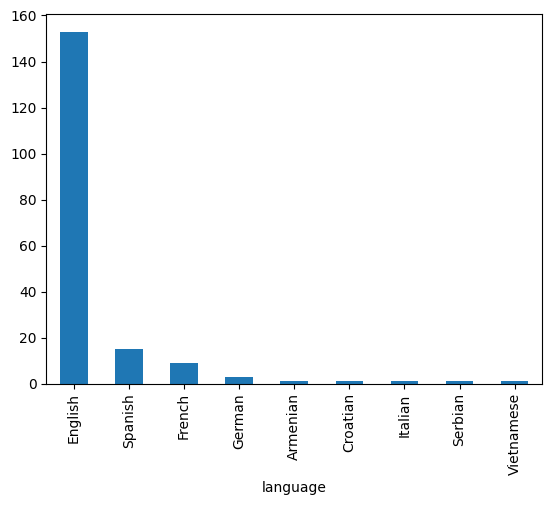

In [6]:
# Bar graph to show how many languages are in the data set
# Delete ".plot.bar()" to just see the raw numbers
project['language'].value_counts().plot.bar()

<Axes: xlabel='country'>

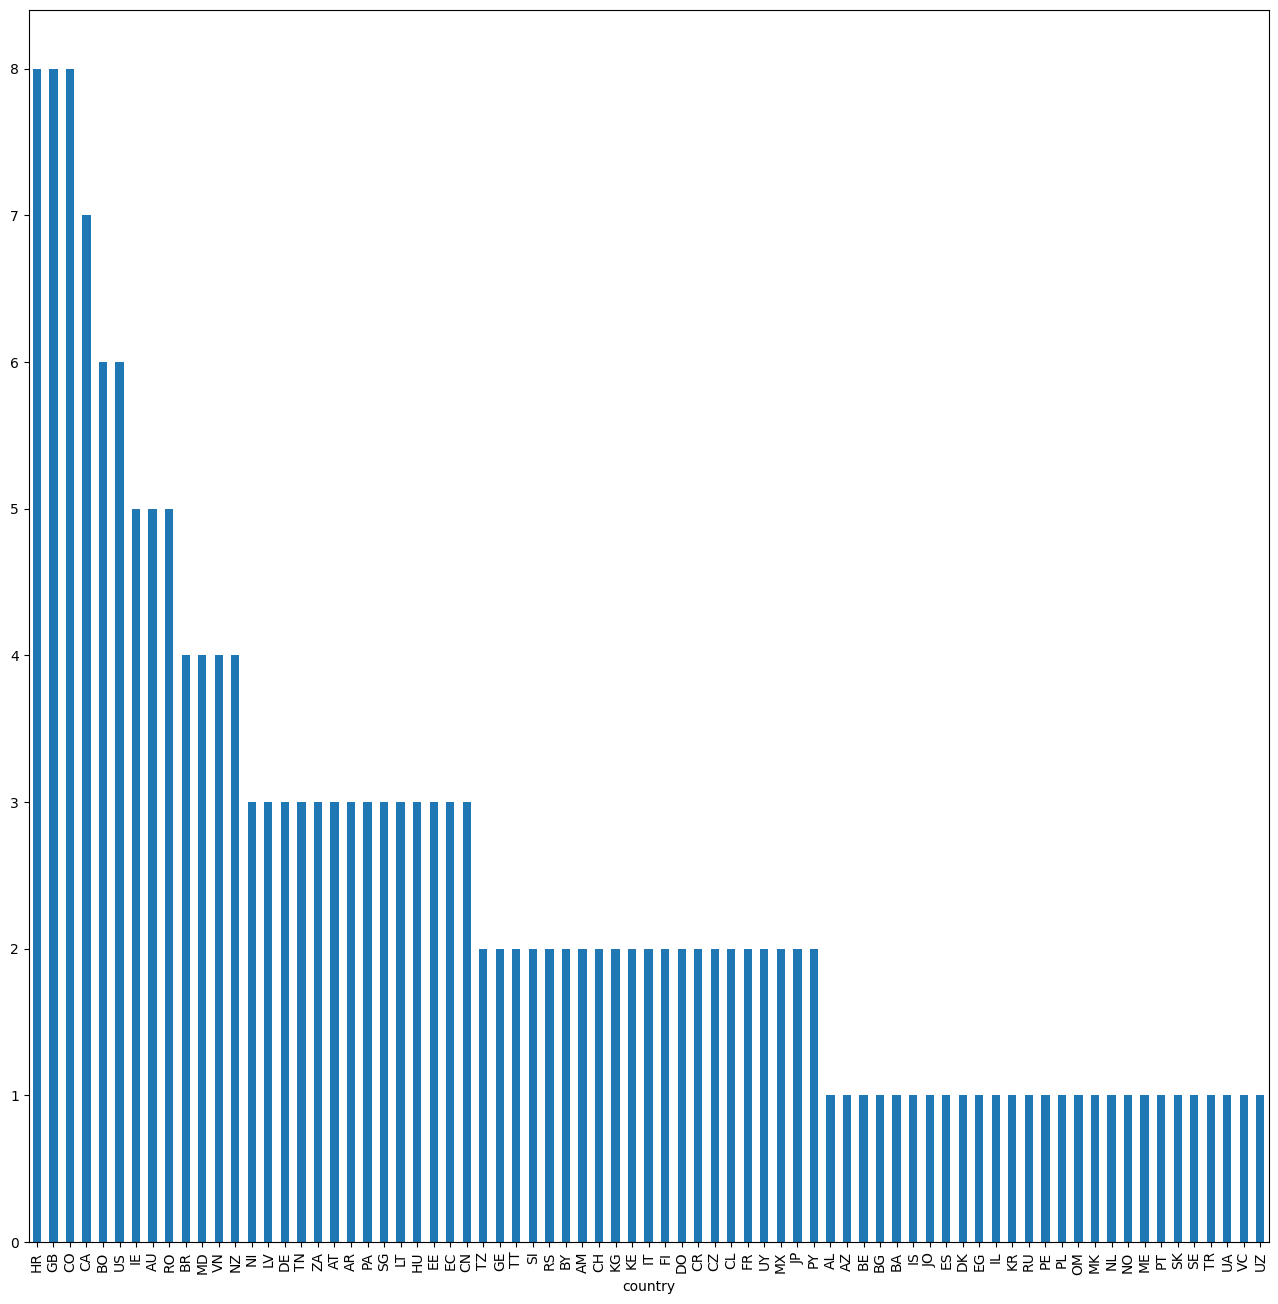

In [9]:
# Bar graph to show the each country in the dataset and how often it shows up
# For raw numbers, delete ".plot.bar(figsize = (16,16))"
project['country'].value_counts().plot.bar(figsize = (16,16))